In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
feli = pd.read_excel('World_Happiness_Report_2017.xls', sheet_name='Figure2.2 WHR 2017')["Happiness score"]
gdp = pd.read_excel("GDP_per_capita.xls", sheet_name='Data', header=3)[["Country Name", "2017"]]
from Fnames import names
feli.index, gdp.index = names, gdp["Country Name"]
feli = pd.DataFrame(feli.reindex(gdp["Country Name"]))
comp = feli.join(gdp["2017"]).dropna()
comp

,Happiness score,2017
Country Name,,
Afghanistan,3.794,585.850064
Angola,3.795,4170.312280
Albania,4.644,4537.862492
United Arab Emirates,6.993,40698.849336
Argentina,6.599,14401.974855
Armenia,4.376,3936.798320
Australia,7.284,53799.938090
Austria,7.006,47290.911650
Azerbaijan,5.234,4131.618310


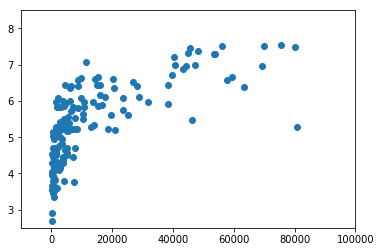

In [3]:
plt.scatter(comp["2017"] ,comp["Happiness score"])
plt.ylim(2.5,8.5)
plt.xlim(-10000, 100000)
plt.show()

In [4]:
var, comp.columns = 0, ["y","x"]
for i in np.arange(0.1,5,0.1):
    reg = sm.ols(formula='y~pow(x,{})'.format(i), data=comp).fit()
    if reg.rsquared > var:
        var = reg.rsquared
        k = i
reg = sm.ols(formula='y~pow(x,{})'.format(k), data=comp).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     326.3
Date:                Thu, 27 Sep 2018   Prob (F-statistic):           2.95e-39
Time:                        18:22:04   Log-Likelihood:                -141.72
No. Observations:                 150   AIC:                             287.4
Df Residuals:                     148   BIC:                             293.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8054      0.346     -2.330      0.021      -1.488      -0.122
pow(x, 0.1)     2.5815      0.143     18.063      0.000       2.299       2.864
==============================================================================
Omnibus:                        1.103   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.576   Jarque-Bera (JB):                0.939
Skew:                          -0.194   Prob(JB):                        0.625
Kurtosis:                       3.014   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

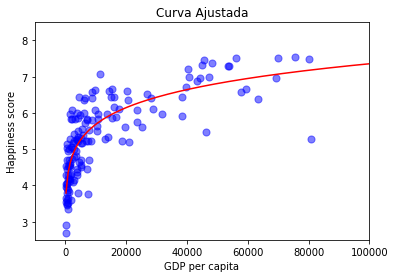

In [5]:
plt.scatter(y=comp['y'], x=comp['x'], color='blue', s=50, alpha=.5)
X_plot = sp.linspace(min(comp['x']), max(comp['x']), len(comp['x']))
plt.plot(X_plot, (X_plot**k)*reg.params[1] + reg.params[0], color='r')
plt.ylim(2.5,8.5)
plt.xlim(-10000, 100000)
plt.title('Curva Ajustada')
plt.xlabel("GDP per capita")
plt.ylabel("Happiness score")
plt.show()